
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [2]:
df = pd.read_csv(r"https://lhd8ts4trw.a.trbcdn.net/cdn/yusuciqe45/presentations/data_science/exercise/1_4pro/churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: >

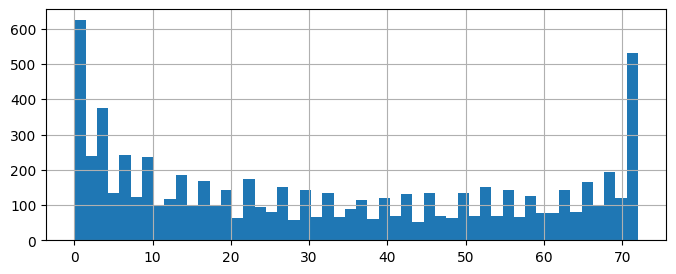

In [4]:
df.tenure.hist(bins=50, figsize=(8, 3))

In [5]:
((df.tenure <= 5).sum() / df.tenure.count() * 100).round(2)

19.47

<Axes: >

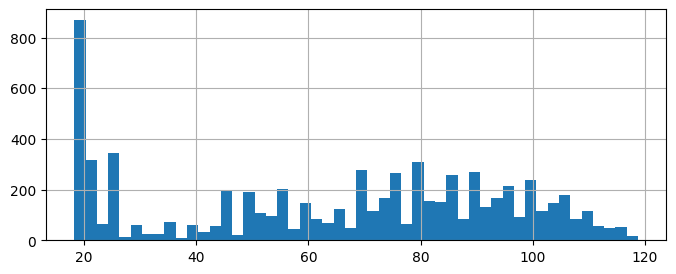

In [6]:
df.MonthlyCharges.hist(bins=50, figsize=(8, 3))

In [7]:
((df.MonthlyCharges <= 25).sum() / df.MonthlyCharges.count() * 100).round(2)

19.96

**Вывод:**
1. `>75%` клиентов являются молодыми людьми.
2. В среднем, клиенты держатся в компании `32` месяца (а медиана = `29` ), то есть `~3` года. При этом около `25%` являются клиентами `>5` лет. А также `19,5%` клиентов пользовалось услугами компании менее `5` месяце.
3. Среднее ежемесячных платежей равно `65$`. А стандартным отклонением от этой суммы является `30$`. То есть, большинство клиентов платит в диапозоне `35$ - 95$`. При этом `20%` клиентов приносит компании менее `25$` ежемесячно (что почти равно самому минимальному платежу в `18$`).

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [8]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


<Axes: >

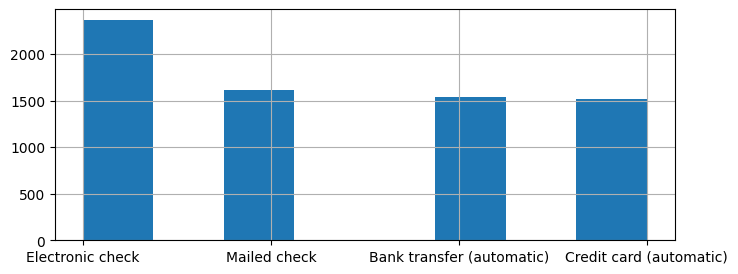

In [9]:
df.PaymentMethod.hist(bins=8, figsize=(8, 3))

<Axes: >

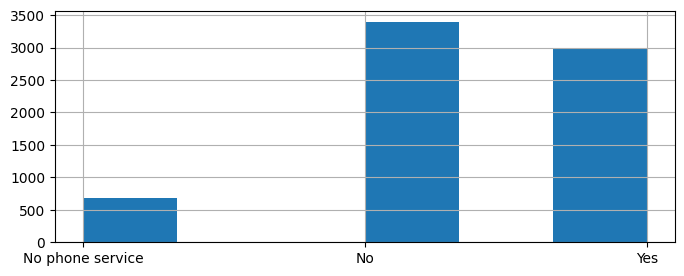

In [10]:
df.MultipleLines.hist(bins=6, figsize=(8, 3))

In [11]:
((df.MultipleLines == "No phone service").sum() / df.MultipleLines.count() * 100).round(2)

9.68

<Axes: >

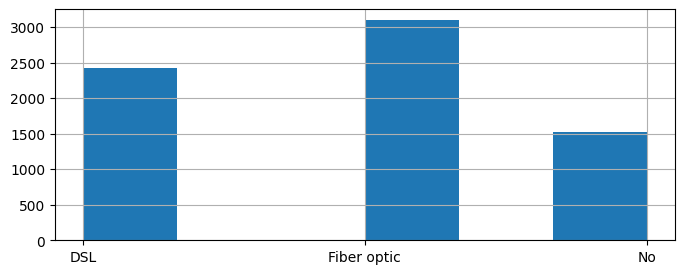

In [12]:
df.InternetService.hist(bins=6, figsize=(8, 3))

<Axes: >

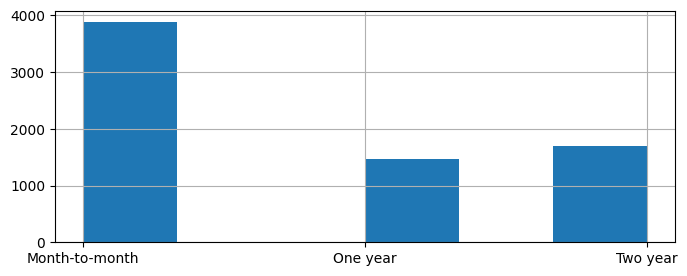

In [13]:
df.Contract.hist(bins=6, figsize=(8, 3))

**Вывод:**
- Распределение по полу и наличию партнёра является симметричным, то есть, никакая из этих групп не преобладает над другой.
- Наличие несовершеннолетних детей наблюдается у трети клиентов.
- Более половины клиентов пользуется только одной линией. У `10%` связи нет вовсе.
- `10%` клиентов интернет не использует. У остальных самым популярным провайдером является `Fiber optic`.
- Только четверть клиентов подключила себе онлайн-безопасность.
- У трети клиентов есть онлайн-резервное копирование.
- Половина клиентов имеет функцию защиты устройства.
- Только треть клиентов имеет доступ к технической поддержке.
- Половина клиентов пользуется потоковым телевидением и (или) стриминговыми сервисами.
- Большинство клиентов использует ежемесячную подписку, а не более длительную.
- Большая часть клиентов имеет безналичные счета.
- В качестве способа оплаты преобладает электронный чек.
- Менее трети клиентов откозалось от услуг компании.


## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [14]:
df.duplicated().sum()

0

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [16]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [17]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [18]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].sample(5)

,tenure,MonthlyCharges,TotalCharges
437,72,114.05,8468.20
348,23,44.95,996.85
3124,68,82.85,5776.45
1706,69,97.65,6743.55
3724,62,24.80,1476.25


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженной на количество времени?

Давайте посмотрим.

In [19]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']][(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
20,1,39.65,39.65
22,1,20.15,20.15
27,1,30.20,30.20
33,1,20.20,20.20


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, поэтому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [20]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [21]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6324,5022-JNQEQ,Female,0,Yes,Yes,9,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,75.85,647.50,No
4070,0531-ZZJWQ,Male,1,Yes,No,55,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.00,4052.40,No
4163,9253-VIFJQ,Male,0,Yes,No,65,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,One year,No,Credit card (automatic),67.05,4309.55,No
6071,0401-WDBXM,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.55,7542.25,No
5201,6202-JVYEU,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:**
- Столбцы `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges` имеют числовой тип, остальные являются категориальными.

# 4. Проверка гипотез

Задание: сравнить две выборки — `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [23]:
h_df = pd.DataFrame({'churn_no': df['tenure'][df.Churn == 'No'],
                     'churn_yes': df['tenure'][df.Churn == 'Yes']})

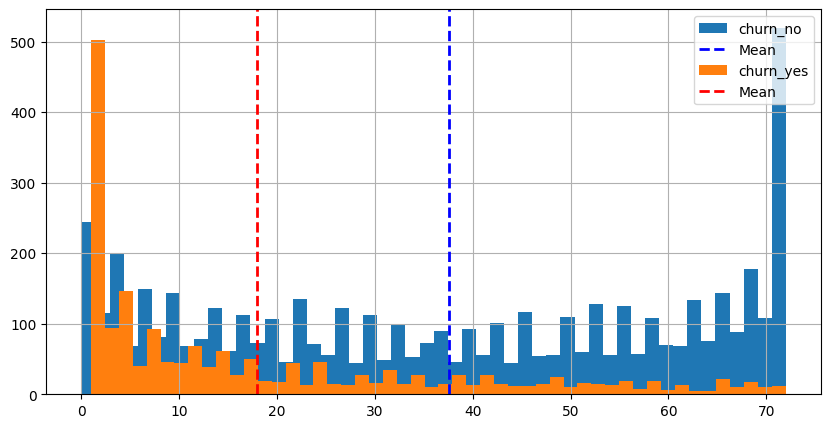

In [24]:
h_df.churn_no.hist(bins=50, figsize=(10, 5), legend='Churn = No')
plt.axvline(h_df.churn_no.mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
h_df.churn_yes.hist(bins=50, figsize=(10, 5), legend='Churn = Yes')
plt.axvline(h_df.churn_yes.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()

In [25]:
h_df.apply('mean')

churn_no     37.569965
churn_yes    17.979133
dtype: float64

In [47]:
alpha = .05

_, pvalue = stats.ttest_ind(df['tenure'][df.Churn == 'No'], df['tenure'][df.Churn == 'Yes'])

print(f"P-value: {pvalue:.5f}. Нулевая гипотеза", "подтверждается" if pvalue > alpha else "отвергается")

P-value: nan. Нулевая гипотеза отвергается


**Вывод:**
- **H0: среднее количество месяцев, в течение которых клиент оставался в компании, не отличается между двумя выборками.**
- **H1: среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.**
- Можно воспользоваться методом `scipy.stats_ind`, который определяет статистическую значимость различий между средними значениями двух независимых выборок. Если `P-value < alpha`, то значит средние выборок отличаются.
- Основная гипотеза подтвердилась - среднее количество месяцев отличается, причём оно больше у тех, кто не ушёл.

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

Для проверки нормальности можно воспользоваться одним из трёх тестов: `K'2-тест Д'Агостино`, `Критерий Шапиро-Уилка` (который не подходит для нашей выборки из-за размера `>5000`), и `Критерий-Андерсона-Дарлинга`.

- **H0: выборка имеет распределение по Гауссу.**
- **H1: выборка не имеет распределения по Гауссу.**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

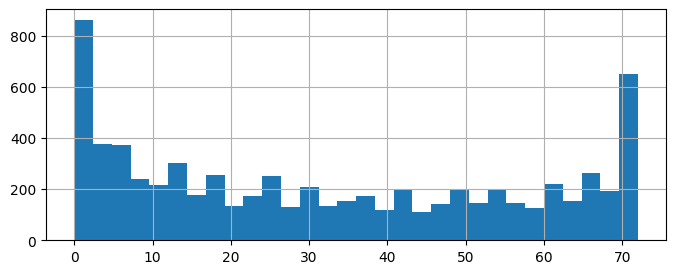

In [28]:
df.tenure.hist(bins=30, figsize=(8, 3))

In [29]:
alpha = .05

_, pvalue = stats.normaltest(df.tenure)

print(f'P-value:{pvalue:.5f}. Нулевая гипотеза', 'отвергается' if pvalue < alpha else 'подтверждается')

P-value:0.00000. Нулевая гипотеза отвергается


<Axes: >

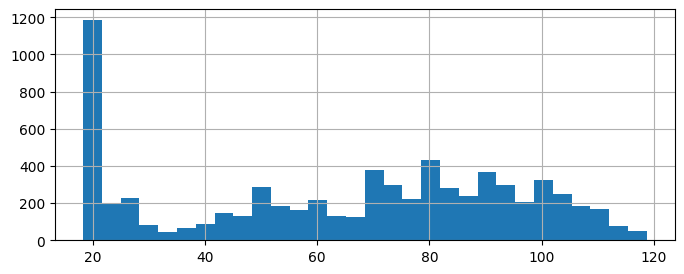

In [30]:
df.MonthlyCharges.hist(bins=30, figsize=(8, 3))

In [31]:
alpha = .05

_, pvalue = stats.normaltest(df.MonthlyCharges)

print(f'P-value:{pvalue:.5f}. Нулевая гипотеза', 'отвергается' if pvalue < alpha else 'подтверждается')

P-value:0.00000. Нулевая гипотеза отвергается


<Axes: >

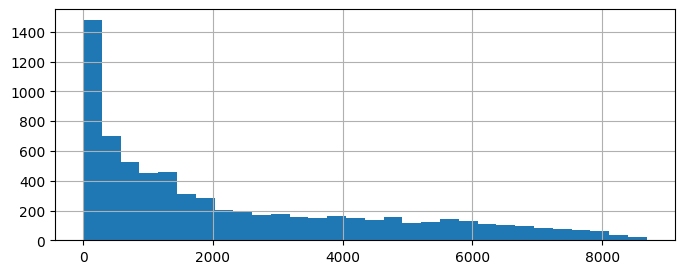

In [32]:
df.TotalCharges.hist(bins=30, figsize=(8, 3))

In [33]:
alpha = .05

_, pvalue = stats.normaltest(df.TotalCharges)

print(f'P-value:{pvalue:.5f}. Нулевая гипотеза', 'отвергается' if pvalue < alpha else 'подтверждается')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:**
- Анализ показал, что ни одна из выборок не является нормальной.

## 6. ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика — выяснить причину ухода клиента.

Ваша задача — провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1.	Предобработка данных — измените датасет в части: категориальные признаки надо перевести в числовые представления. Главное —понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное.
2.	Выберите нужные гипотезы, основываясь на типах признаков.
3.	Проведите анализ и выясните, почему клиент уходит, с чем коррелирует Churn, может это зависит от пола клиента? Или есть иные обстоятельства?
4.	После проверки гипотез постройте тепловую карту корреляции Phik и сделайте дополнительный вывод.
5.	Дополните общий вывод.


**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

In [34]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [38]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Большинство столбцов предствлены бинарными типами (а в некоторых присутвует третье значени `No phone service` или `No internet service`). Их можно преобразовать в числовой тип, произведя замену `Yes = 1`, `No = 0`, `No phone service = 0`, `No internet service = 0`. Столбцы gender, `InternetService`, `Contract`, `PaymentMethod` содержат категории, их можно преобразовать в числовые с помощью функции `factorize`, присвоив каждой категории свой код.

In [39]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

conversion_mapping = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}

df[columns_to_convert] = df[columns_to_convert].replace(conversion_mapping).astype(int)

In [42]:
for col in df[['gender', 'InternetService', 'Contract', 'PaymentMethod']]:
    df[col] = df[col].factorize()[0]

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int32  


### Определим гипотезы, по которым клиенты отказываются от услуг компании:
- (Нулевая гипотеза : Альтернативная гипотеза)
- Количество ушедших мужчин и женщин равно : количество различается
- Пожилые и молодые уходят одинаково часто : молодые уходят чаще
- Клиенты с партнёром и без уходят одинкового : клинты с партнёрами дольше остаются
- Клиенты кормильцы и не кормильцы 

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
InternetService,7043.0,0.872923,0.737796,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00


# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

- Был произведён анализ данных компании-провайдера. Была произведена проверка на дубликаты и пустые значения. Дубликатов обнаружено не было. Пустые значения не обнаружидись, но в действительности присутствовали в столбце `TotalCharges`. Их удалось обнаружить и устранить путём удаления незначазих проблеов в строке. После чего столбец был конвертирован в числовой тип.
1. По результатам анализа данных клиетов было установлено, что в среднем клиент платит `65$` в месяц, а за всё время предоставления услуг клиенты приносят `2280$` в компанию.
2. Распределение клиентов по полу является симметричным.
3. Большинство клиентов (`~90%`) пользуется интернетом и дополнительными услугами, но каждой конкретной услугой пользуется `<40%` клиентов.
4. Большинство клиентов является молодыми людьми.
- Была произведена проверка гипотезы того, что среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками. Был использован метод `scipy.stats.ttest_ind`, который выполняет двухсторонний тест t-критерия Стьюдента и определяет статистичесекю значимость различий между средними значениями двух независимых выборок. По итогам проверки выяснилось, что эта гипотиза ошибочна, и средние не равны. И что клиенты, которые не ушли, в среднем пользуются услугами компании большее число месяцев.
- Были проверены гипотезы о нормальности распределения числовых выборок. Был использован критерий К'2 тест Д'Агостино (а критерий Шапиро-Уилка был исключён из-за превышающего объёма данных). По итогам проверки выяснилось, что ни одна из выборок не является нормальной.
- Так же, все проверки гипотез были проиллюстрированы на гистограммах, на которых достоверность результатов видна на глаз.